In [6]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Defining constants for project
IMAGE_WIDTH, IMAGE_HEIGHT = 28, 28  # MNIST images are 28x28 pixels
NUM_CLASSES = 10  # There are 10 classes (digits 0-9) in the MNIST dataset

In [7]:
# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshaping the data to include a channel dimension and normalize the pixel values
x_train = x_train.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1).astype('float32') / 255
x_test = x_test.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1).astype('float32') / 255

y_train_encoded = to_categorical(y_train, NUM_CLASSES)
y_test_encoded = to_categorical(y_test, NUM_CLASSES)

print("Training data shape:", x_train.shape)  # Example output: (60000, 28, 28, 1)
print("Test data shape:", x_test.shape)  # Example output: (10000, 28, 28, 1)

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Defining the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    # Flatten the output of the previous layers to form a feature vector
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Output layer with softmax activation for multi-class classification
    Dense(NUM_CLASSES, activation='softmax')
])

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

Epoch 1/10
1500/1500 - 52s - loss: 0.2866 - accuracy: 0.9115 - val_loss: 0.0602 - val_accuracy: 0.9818 - 52s/epoch - 35ms/step
Epoch 2/10
1500/1500 - 42s - loss: 0.1083 - accuracy: 0.9678 - val_loss: 0.0493 - val_accuracy: 0.9862 - 42s/epoch - 28ms/step
Epoch 3/10
1500/1500 - 46s - loss: 0.0814 - accuracy: 0.9749 - val_loss: 0.0405 - val_accuracy: 0.9882 - 46s/epoch - 30ms/step
Epoch 4/10
1500/1500 - 42s - loss: 0.0710 - accuracy: 0.9789 - val_loss: 0.0382 - val_accuracy: 0.9893 - 42s/epoch - 28ms/step
Epoch 5/10
1500/1500 - 42s - loss: 0.0638 - accuracy: 0.9803 - val_loss: 0.0381 - val_accuracy: 0.9893 - 42s/epoch - 28ms/step
Epoch 6/10
1500/1500 - 43s - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.0364 - val_accuracy: 0.9910 - 43s/epoch - 29ms/step
Epoch 7/10
1500/1500 - 42s - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0356 - val_accuracy: 0.9901 - 42s/epoch - 28ms/step
Epoch 8/10
1500/1500 - 44s - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0331 - val_accuracy: 0.9920 - 44s/ep

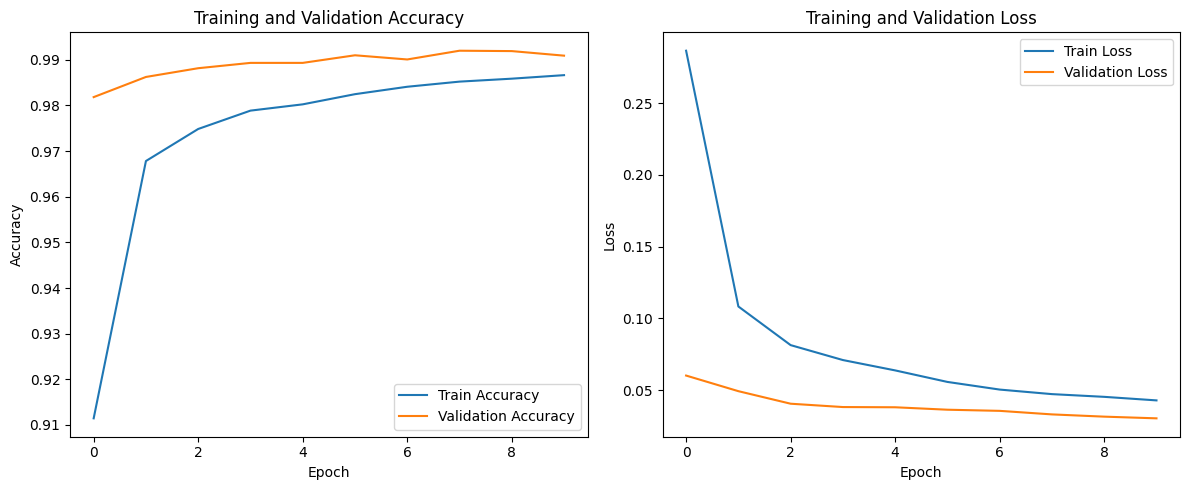

In [9]:
# Defines training parameters
EPOCHS = 10
BATCH_SIZE = 32

# Train the model
history = model.fit(
    x_train, y_train_encoded,  # Training data and labels
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,  # Use 20% of the training data for validation
    verbose=2  # Verbose mode for detailed logging output
)

# Plot the training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
import seaborn as sns

313/313 - 3s - loss: 0.0239 - accuracy: 0.9927 - 3s/epoch - 10ms/step
Test Accuracy: 99.27%
Test Loss: 0.0239
313/313 [==============================] - 3s 8ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



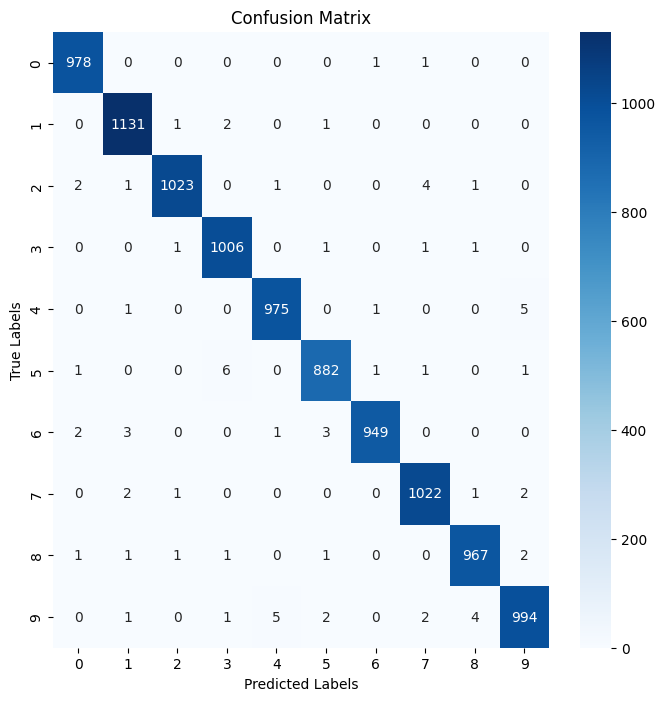

In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

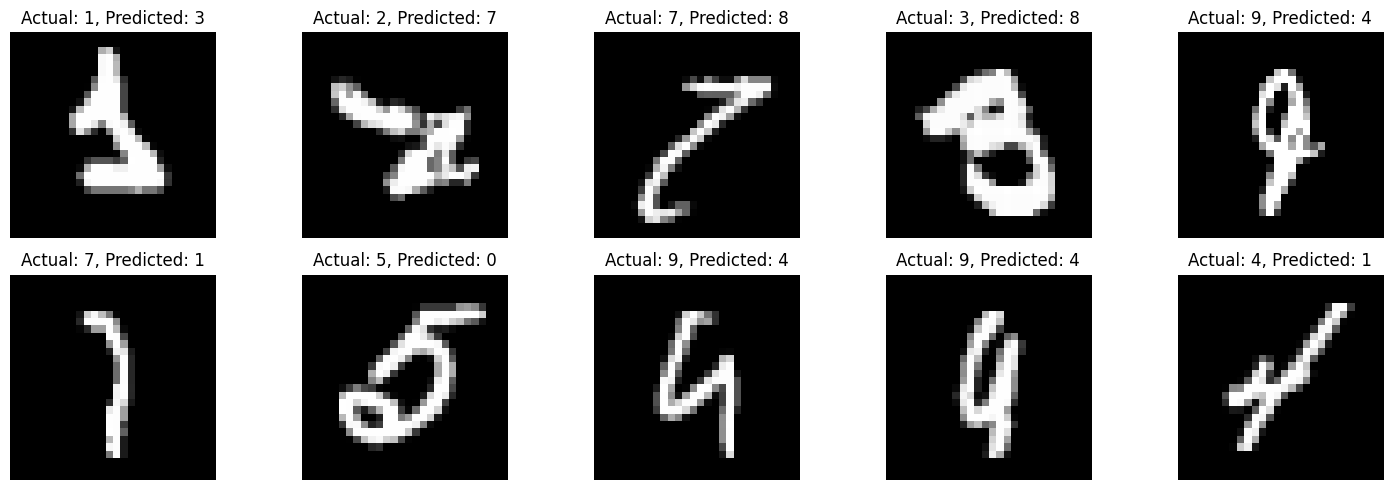

In [18]:
# Determine the number of misclassified images to display (up to 10)
num_display = min(10, len(misclassified_indices))

# Randomly select indices from the misclassified indices array
selected_indices = np.random.choice(misclassified_indices, size=num_display, replace=False)

# Display the selected misclassified images
plt.figure(figsize=(15, 5))
for i, index in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)
    # Access the misclassified image using the correct index from x_test
    image = x_test[index].reshape(28, 28)  # Use x_test to access the image
    actual_label = y_true[index]
    predicted_label = y_pred_classes[index]
    plt.imshow(image, cmap='gray')
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
from tensorflow.keras.optimizers import Adam

# Adjusting hyperparameters
new_learning_rate = 0.0001
new_dropout_rate = 0.3

# Define the adjusted CNN model
model_improved = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(new_dropout_rate),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(new_dropout_rate),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(new_dropout_rate),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the adjusted model with the new learning rate
model_improved.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=new_learning_rate), metrics=['accuracy'])

# Train the adjusted model
history_improved = model_improved.fit(
    x_train, y_train_encoded,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=2
)

# Evaluate the adjusted model on the test set
test_loss_improved, test_accuracy_improved = model_improved.evaluate(x_test, y_test_encoded, verbose=2)

print(f"Improved Model Test Accuracy: {test_accuracy_improved * 100:.2f}%")
print(f"Improved Model Test Loss: {test_loss_improved:.4f}")

Epoch 1/10
1500/1500 - 47s - loss: 0.7017 - accuracy: 0.7786 - val_loss: 0.1925 - val_accuracy: 0.9458 - 47s/epoch - 31ms/step
Epoch 2/10
1500/1500 - 42s - loss: 0.2462 - accuracy: 0.9248 - val_loss: 0.1211 - val_accuracy: 0.9657 - 42s/epoch - 28ms/step
Epoch 3/10
1500/1500 - 47s - loss: 0.1765 - accuracy: 0.9460 - val_loss: 0.0963 - val_accuracy: 0.9721 - 47s/epoch - 31ms/step
Epoch 4/10
1500/1500 - 42s - loss: 0.1436 - accuracy: 0.9554 - val_loss: 0.0797 - val_accuracy: 0.9772 - 42s/epoch - 28ms/step
Epoch 5/10
1500/1500 - 43s - loss: 0.1242 - accuracy: 0.9614 - val_loss: 0.0718 - val_accuracy: 0.9793 - 43s/epoch - 28ms/step
Epoch 6/10
1500/1500 - 41s - loss: 0.1064 - accuracy: 0.9669 - val_loss: 0.0634 - val_accuracy: 0.9815 - 41s/epoch - 28ms/step
Epoch 7/10
1500/1500 - 42s - loss: 0.0963 - accuracy: 0.9706 - val_loss: 0.0589 - val_accuracy: 0.9822 - 42s/epoch - 28ms/step
Epoch 8/10
1500/1500 - 42s - loss: 0.0894 - accuracy: 0.9716 - val_loss: 0.0542 - val_accuracy: 0.9852 - 42s/ep

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,   # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height)
    shear_range=0.1,         # Random shear transformations
    zoom_range=0.1,          # Randomly zooming inside pictures
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill in new pixels after a rotation or shift
)

# Apply data augmentation to the training data
train_generator = datagen.flow(x_train, y_train_encoded, batch_size=BATCH_SIZE)

# Retrain the model with the same architecture as before
model_with_aug = model_improved  # Using the improved model as the base

# Train the model with augmented data
history_with_aug = model_with_aug.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test_encoded),
    steps_per_epoch=len(x_train) / BATCH_SIZE,
    verbose=2
)

# Evaluate the model with augmented data on the test set
test_loss_with_aug, test_accuracy_with_aug = model_with_aug.evaluate(x_test, y_test_encoded, verbose=2)

print(f"Model with Data Augmentation Test Accuracy: {test_accuracy_with_aug * 100:.2f}%")
print(f"Model with Data Augmentation Test Loss: {test_loss_with_aug:.4f}")


Epoch 1/10
1875/1875 - 80s - loss: 0.7027 - accuracy: 0.7737 - val_loss: 0.0978 - val_accuracy: 0.9697 - 80s/epoch - 43ms/step
Epoch 2/10
1875/1875 - 68s - loss: 0.4647 - accuracy: 0.8503 - val_loss: 0.0911 - val_accuracy: 0.9698 - 68s/epoch - 36ms/step
Epoch 3/10
1875/1875 - 69s - loss: 0.3864 - accuracy: 0.8779 - val_loss: 0.0888 - val_accuracy: 0.9708 - 69s/epoch - 37ms/step
Epoch 4/10
1875/1875 - 67s - loss: 0.3426 - accuracy: 0.8934 - val_loss: 0.0734 - val_accuracy: 0.9768 - 67s/epoch - 36ms/step
Epoch 5/10
1875/1875 - 68s - loss: 0.3090 - accuracy: 0.9031 - val_loss: 0.0658 - val_accuracy: 0.9782 - 68s/epoch - 36ms/step
Epoch 6/10
1875/1875 - 67s - loss: 0.2882 - accuracy: 0.9112 - val_loss: 0.0583 - val_accuracy: 0.9814 - 67s/epoch - 36ms/step
Epoch 7/10
1875/1875 - 68s - loss: 0.2678 - accuracy: 0.9158 - val_loss: 0.0618 - val_accuracy: 0.9798 - 68s/epoch - 36ms/step
Epoch 8/10
1875/1875 - 68s - loss: 0.2616 - accuracy: 0.9196 - val_loss: 0.0605 - val_accuracy: 0.9791 - 68s/ep